In [32]:
import matplotlib.pyplot as plt
import numpy as np
# Importing the libraries
import pandas as pd
import seaborn as sns


In [9]:
# Configure visualizations
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

# Display all columns in pandas dataframes
pd.set_option('display.max_columns', None)

# Reading the data
train_data = pd.read_csv('Train_Data.csv')
test_data = pd.read_csv('Test_Data.csv')

In [10]:
# Let's first examine our data
print("Training Data Shape:", train_data.shape)
print("\nFeatures in the dataset:")
for column in train_data.columns:
    print(f"{column}: {train_data[column].dtype}")

# Display first few rows
print("\nFirst few rows of training data:")
display(train_data.head())

Training Data Shape: (614, 13)

Features in the dataset:
Loan_ID: object
Gender: object
Married: object
Dependents: object
Education: object
Self_Employed: object
ApplicantIncome: int64
CoapplicantIncome: float64
LoanAmount: float64
Loan_Amount_Term: float64
Credit_History: float64
Property_Area: object
Loan_Status: object

First few rows of training data:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Missing values in training data:


,Missing Count,Missing Percentage
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599


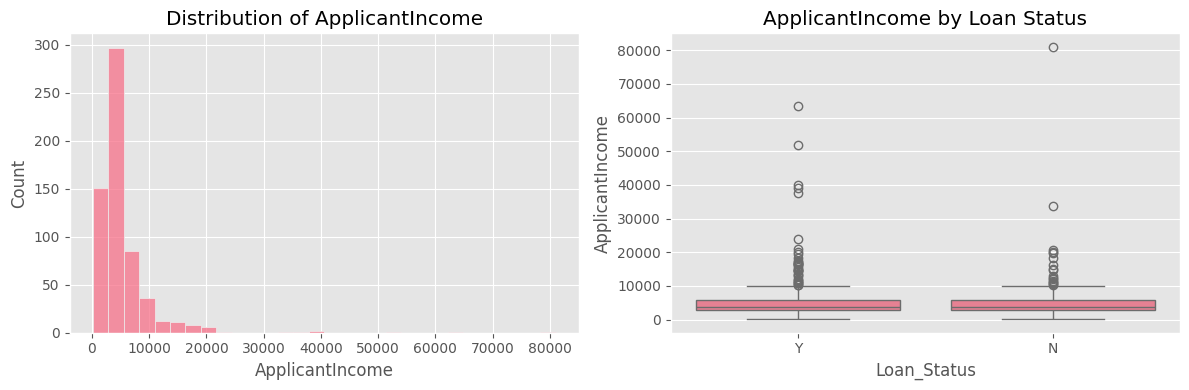


Summary Statistics for ApplicantIncome:
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


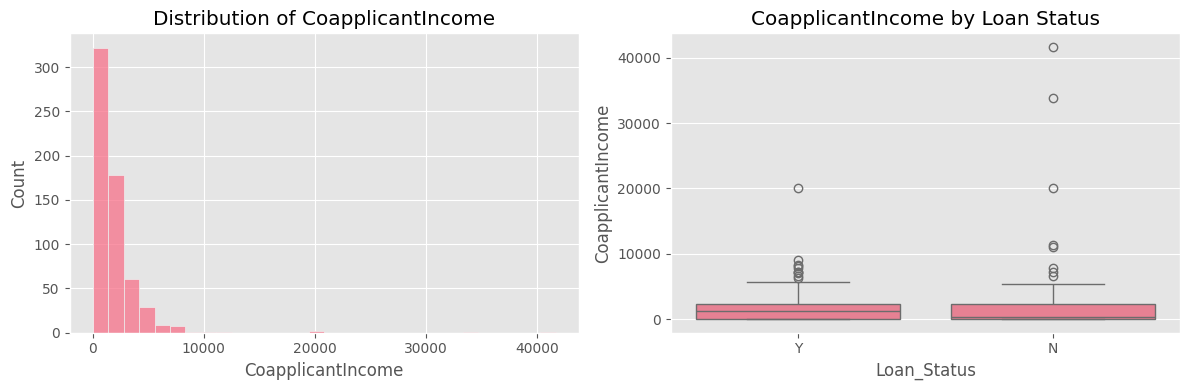


Summary Statistics for CoapplicantIncome:
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


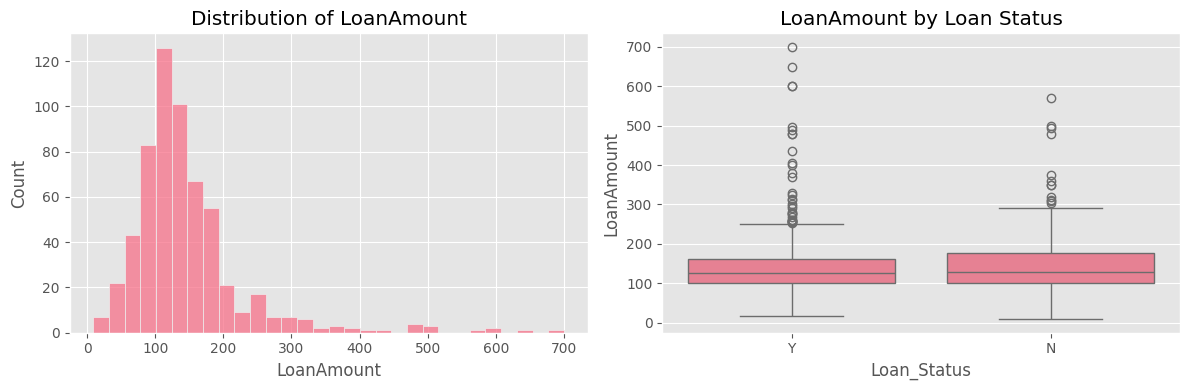


Summary Statistics for LoanAmount:
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


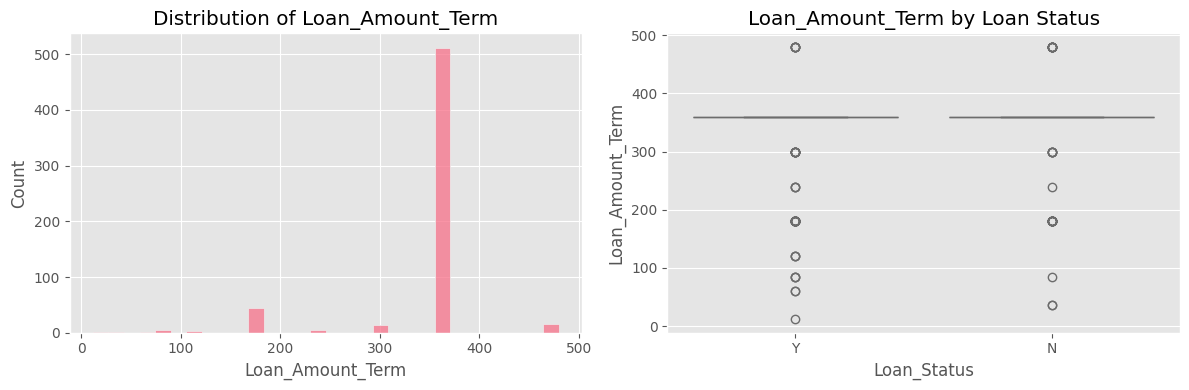


Summary Statistics for Loan_Amount_Term:
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


In [12]:
# Check missing values
print("\nMissing values in training data:")
missing_train = train_data.isnull().sum()
missing_percent = (missing_train / len(train_data)) * 100
missing_data = pd.DataFrame({
    'Missing Count': missing_train,
    'Missing Percentage': missing_percent
})
display(missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False))


# Function for numerical feature analysis
def analyze_numerical_feature(data, feature):
    plt.figure(figsize=(12, 4))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=feature, bins=30)
    plt.title(f'Distribution of {feature}')

    # Box plot with loan status
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x='Loan_Status', y=feature)
    plt.title(f'{feature} by Loan Status')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\nSummary Statistics for {feature}:")
    print(data[feature].describe())


# Analyze numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for feature in numerical_features:
    analyze_numerical_feature(train_data, feature)


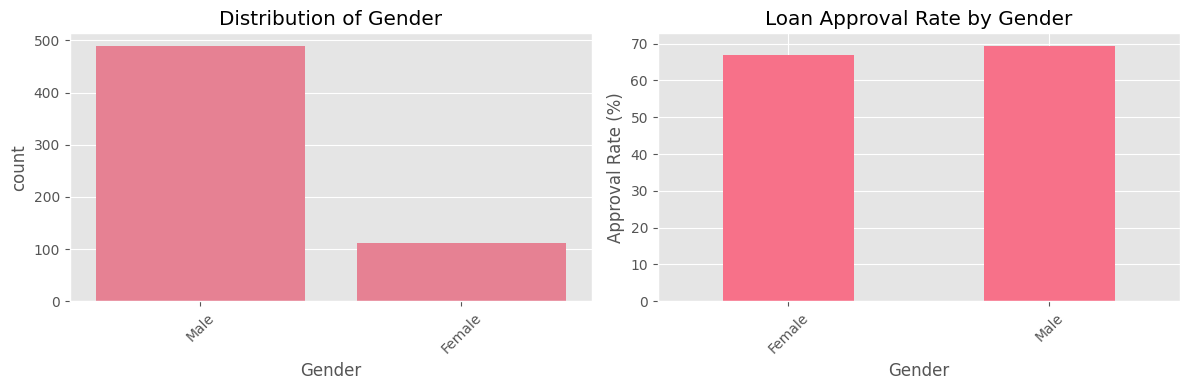


Frequency Distribution for Gender:
Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64


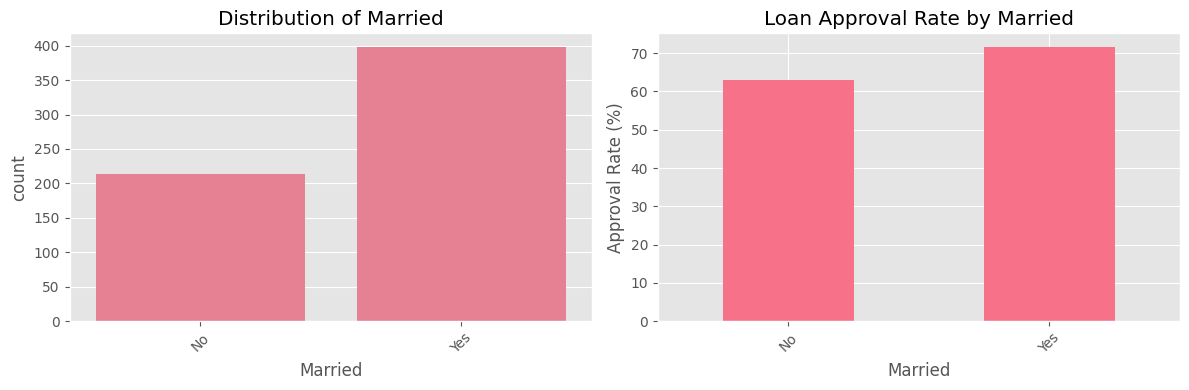


Frequency Distribution for Married:
Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64


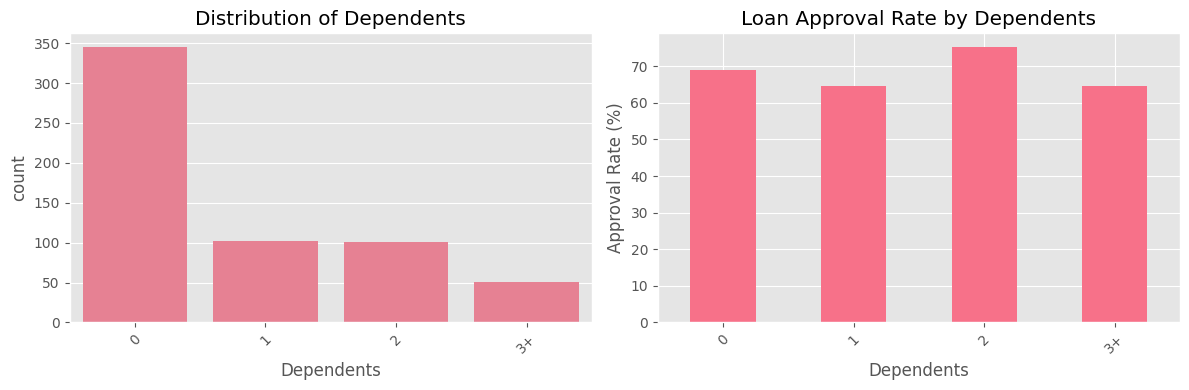


Frequency Distribution for Dependents:
Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: proportion, dtype: float64


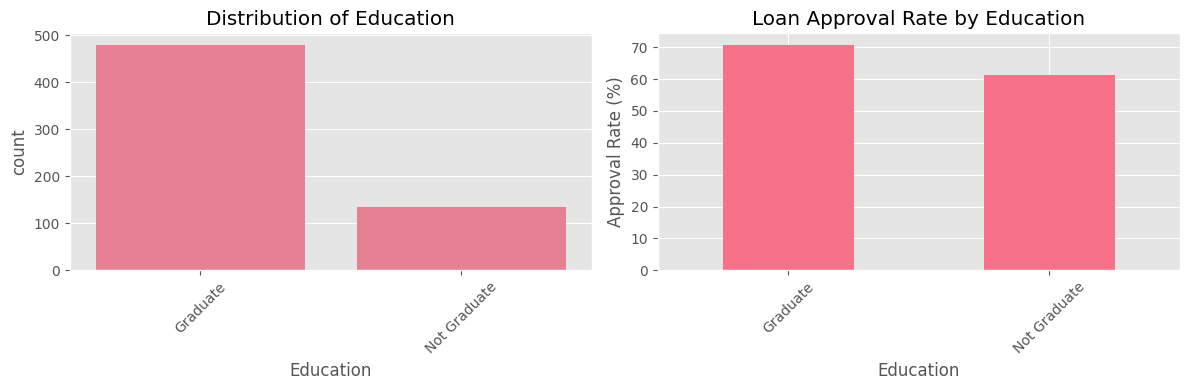


Frequency Distribution for Education:
Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64


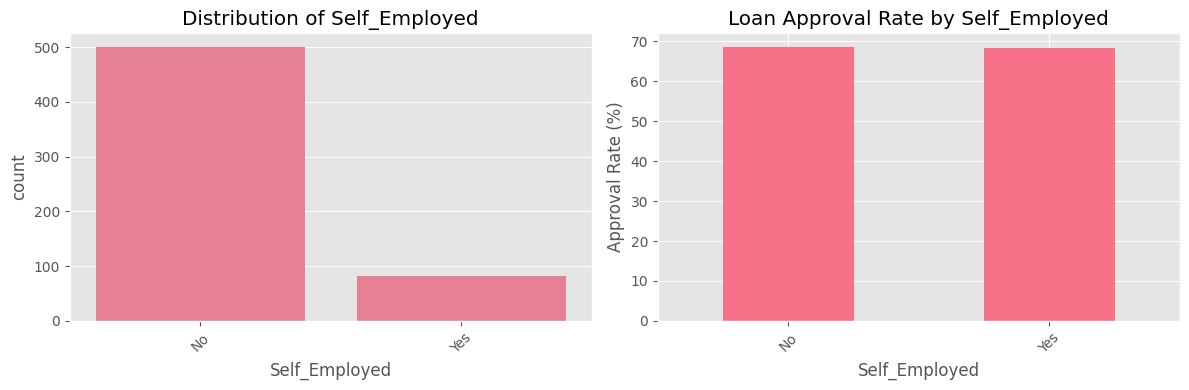


Frequency Distribution for Self_Employed:
Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64


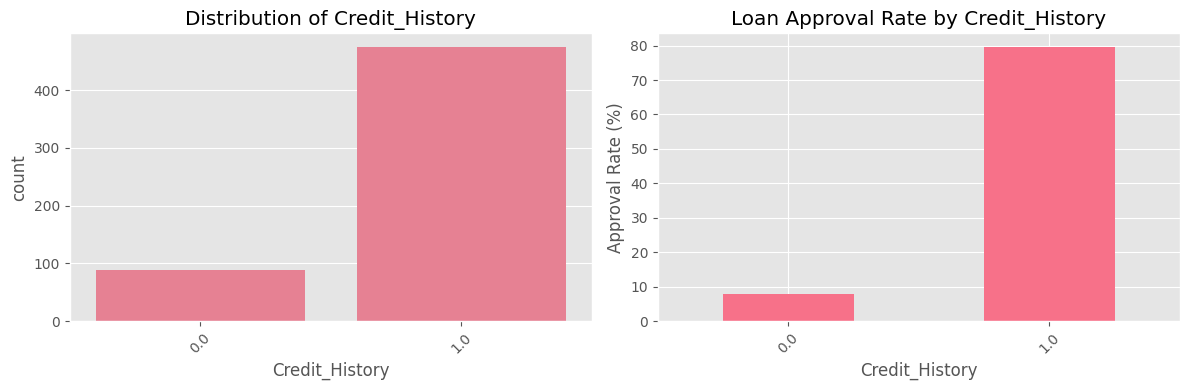


Frequency Distribution for Credit_History:
Credit_History
1.0    84.219858
0.0    15.780142
Name: proportion, dtype: float64


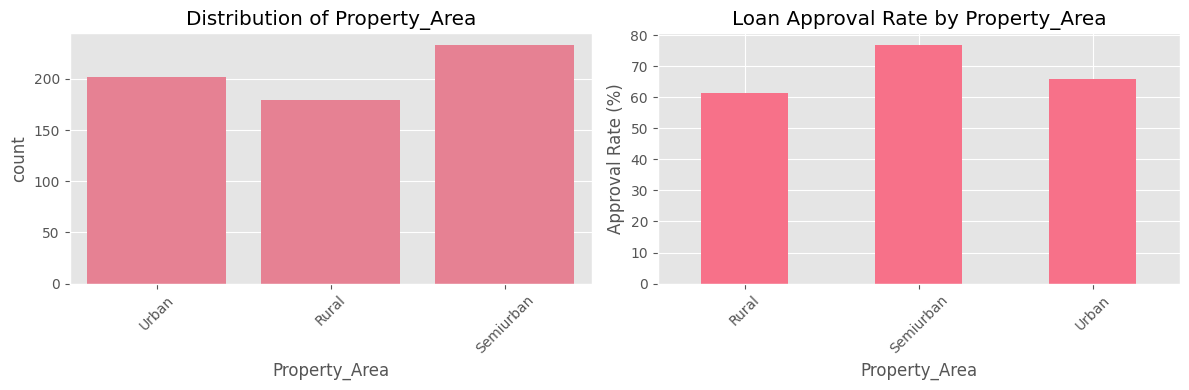


Frequency Distribution for Property_Area:
Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64


In [13]:
# Function for categorical feature analysis
def analyze_categorical_feature(data, feature):
    plt.figure(figsize=(12, 4))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

    # Loan status distribution by category
    plt.subplot(1, 2, 2)
    loan_status_dist = pd.crosstab(data[feature], data['Loan_Status'], normalize='index') * 100
    loan_status_dist['Y'].plot(kind='bar')
    plt.title(f'Loan Approval Rate by {feature}')
    plt.ylabel('Approval Rate (%)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Print frequency distribution
    print(f"\nFrequency Distribution for {feature}:")
    print(data[feature].value_counts(normalize=True) * 100)


# Analyze categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education',
                        'Self_Employed', 'Credit_History', 'Property_Area']
for feature in categorical_features:
    analyze_categorical_feature(train_data, feature)


In [23]:
# Create feature engineering function
def engineer_features(data):
    # Create a copy of the data
    df = data.copy()

    # Total Income
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

    # Log transformation of income features
    df['Log_Total_Income'] = np.log(df['Total_Income'] + 1)
    df['Log_ApplicantIncome'] = np.log(df['ApplicantIncome'] + 1)
    df['Log_CoapplicantIncome'] = np.log(df['CoapplicantIncome'] + 1)
    df['Log_LoanAmount'] = np.log(df['LoanAmount'] + 1)

    # Income to Loan Ratio
    df['Income_to_Loan_Ratio'] = df['Total_Income'] / df['LoanAmount']

    # EMI (Estimated Monthly Installment)
    # Assuming interest rate of 10% per annum
    df['EMI'] = (df['LoanAmount'] * 1000 * 0.1) / 12

    # Balance Income after EMI
    df['Balance_Income'] = df['Total_Income'] - df['EMI']

    return df


In [27]:
def handle_missing_values(data):
    # Create a copy of the dataframe to avoid modifying the original
    df = data.copy()

    # Categorical variables - fill with mode
    # Using the recommended approach to avoid chaining
    df.loc[:, 'Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
    df.loc[:, 'Married'] = df['Married'].fillna(df['Married'].mode()[0])
    df.loc[:, 'Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
    df.loc[:, 'Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

    # Numerical variables - fill with median
    df.loc[:, 'LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
    df.loc[:, 'Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

    # Credit History - create a binary flag for missing values and fill with mode
    df.loc[:, 'Credit_History_Missing'] = df['Credit_History'].isnull().astype(int)
    df.loc[:, 'Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

    return df

In [28]:
# Apply feature engineering and missing value handling
train_processed = handle_missing_values(train_data)
train_processed = engineer_features(train_processed)

In [38]:
# Encode categorical variables
def encode_categorical_variables(data):
    df = data.copy()

    # Label encoding for binary variables
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    binary_features = ['Gender', 'Married', 'Self_Employed']

    for feature in binary_features:
        df[feature] = le.fit_transform(df[feature])

    # Ordinal encoding for Dependents
    df['Dependents'] = df['Dependents'].replace('3+', '3')
    df['Dependents'] = pd.to_numeric(df['Dependents'])

    # One-hot encoding for nominal variables
    nominal_features = ['Education', 'Property_Area']
    df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

    return df


# Apply encoding
train_final = encode_categorical_variables(train_processed)


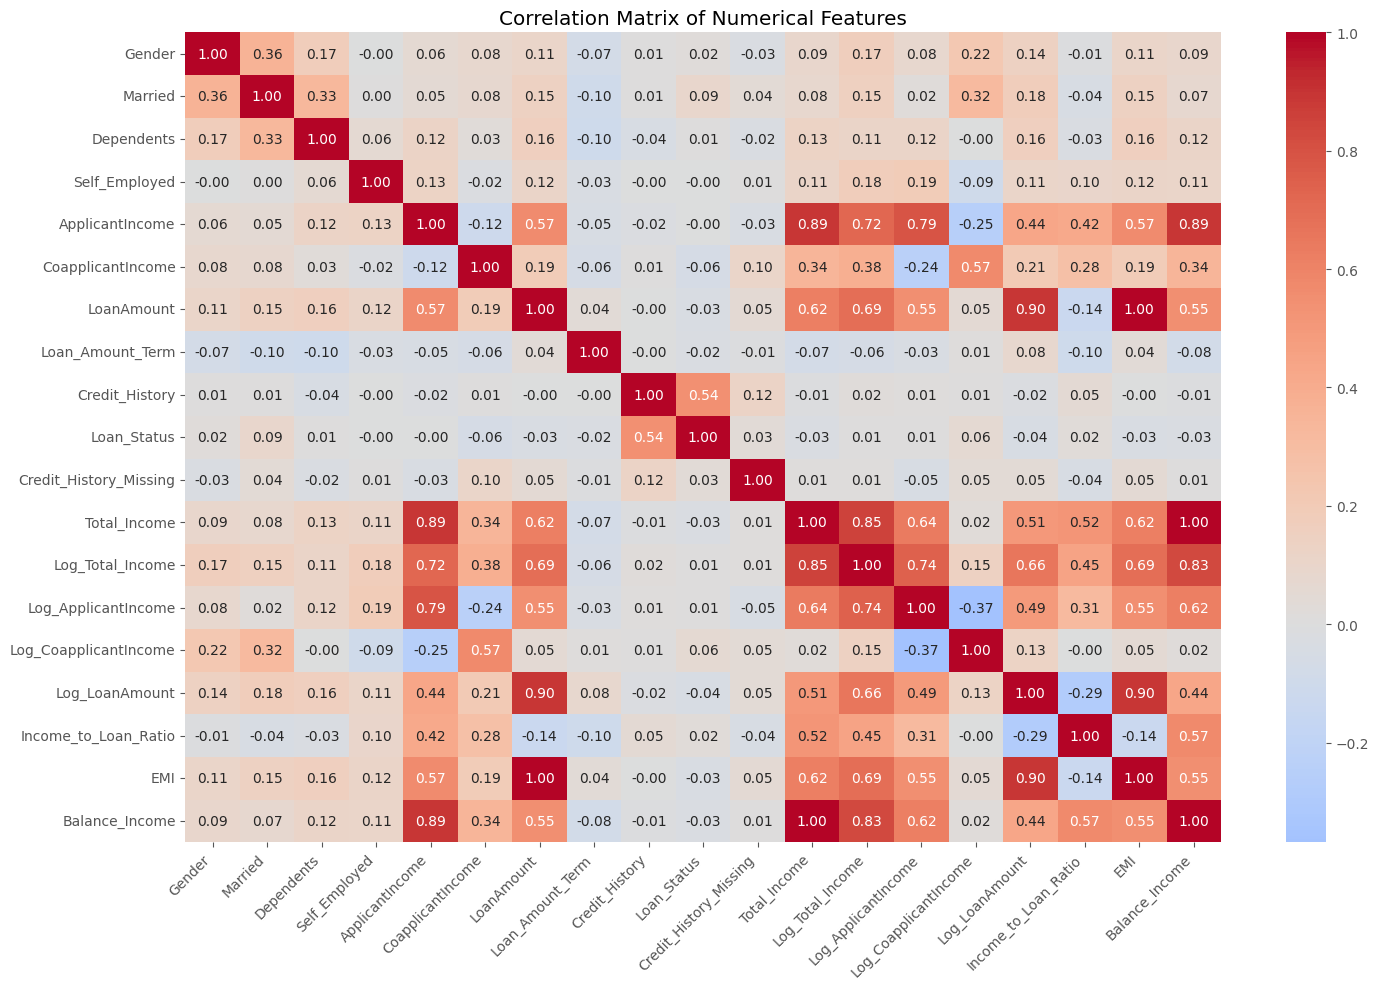


Correlations with Loan Status:
Loan_Status               1.000000
Credit_History            0.540556
Married                   0.091478
Log_CoapplicantIncome     0.060593
Credit_History_Missing    0.033849
Income_to_Loan_Ratio      0.023870
Gender                    0.017987
Log_ApplicantIncome       0.010959
Dependents                0.010118
Log_Total_Income          0.007232
Self_Employed            -0.003700
ApplicantIncome          -0.004710
Loan_Amount_Term         -0.022549
Balance_Income           -0.029540
Total_Income             -0.031271
LoanAmount               -0.033214
EMI                      -0.033214
Log_LoanAmount           -0.038242
CoapplicantIncome        -0.059187
Name: Loan_Status, dtype: float64


In [40]:
# First, let's drop the Loan_ID column as it's not needed for analysis
train_final = train_final.drop('Loan_ID', axis=1)

# Convert Loan_Status to numeric (Y=1, N=0)
train_final['Loan_Status'] = train_final['Loan_Status'].map({'Y': 1, 'N': 0})

# Select only numeric columns for correlation analysis
numeric_columns = train_final.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_final[numeric_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Let's also print key correlations with our target variable
target_correlations = correlation_matrix['Loan_Status'].sort_values(ascending=False)
print("\nCorrelations with Loan Status:")
print(target_correlations)

# Save the final processed dataset
train_final.to_csv('processed_train_data_final.csv', index=False)